### Example for using function load_data and printing dataset 

In [1]:
from hw3_utils import load_data
#downsample the training and validation dataset if needed, ds_rate should be larger than 1.
ds_rate=None
datasets = load_data(ds_rate=ds_rate,theano_shared=False)
train_set_x, train_set_y = datasets[0]
valid_set_x, valid_set_y = datasets[1]
test_set_x, test_set_y = datasets[2]
print('Current training data size is %i'%train_set_x.shape[0])
print('Current validation data size is %i'%valid_set_x.shape[0])
print('Current test data size is %i'%test_set_x.shape[0])

Current training data size is 40000
Current validation data size is 10000
Current test data size is 10000


Using gpu device 0: GRID K520


/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


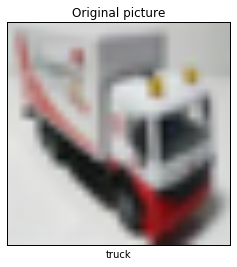

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
class_=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#Choose an image index
i=15
plt.imshow(np.reshape(valid_set_x[i],(3,32,32)).transpose(1,2,0))
plt.xticks([])
plt.yticks([])
plt.title('Original picture')
plt.xlabel('%s'%class_[valid_set_y[i]])

# ECBM E6040 Homework 3 - Programming Problem

### Problem 1: Implement the convolutional neural network depicted in this problem

In [1]:
from hw3 import test_lenet
test_lenet(learning_rate=0.1, n_epochs=200, nkerns=[32, 64], batch_size=500)

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


... building the model
training @ iter =  0
epoch 1, minibatch 80/80, validation error 68.340000 %
     epoch 1, minibatch 80/80, test error of best model 68.600000 %
training @ iter =  100
epoch 2, minibatch 80/80, validation error 60.040000 %
     epoch 2, minibatch 80/80, test error of best model 59.490000 %
training @ iter =  200
epoch 3, minibatch 80/80, validation error 55.100000 %
     epoch 3, minibatch 80/80, test error of best model 54.580000 %
training @ iter =  300
epoch 4, minibatch 80/80, validation error 51.000000 %
     epoch 4, minibatch 80/80, test error of best model 50.840000 %
epoch 5, minibatch 80/80, validation error 55.320000 %
training @ iter =  400
epoch 6, minibatch 80/80, validation error 47.880000 %
     epoch 6, minibatch 80/80, test error of best model 47.740000 %
training @ iter =  500
epoch 7, minibatch 80/80, validation error 45.370000 %
     epoch 7, minibatch 80/80, test error of best model 44.730000 %
training @ iter =  600
epoch 8, minibatch 80/80,

The training process for function test_lenet ran for 36.93m


### Problem 2: Bullet 1: Augmentation by translation

Show a 4*4 figure of 16 input images with this augmentation

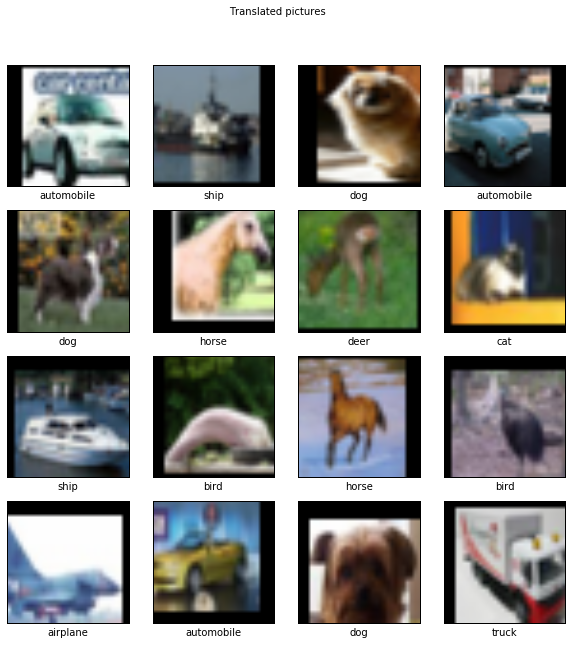

In [21]:
from hw3_utils import load_data
from hw3 import translate_image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ds_rate=None
datasets = load_data(ds_rate=ds_rate,theano_shared=False)
train_set_x, train_set_y = datasets[0]
valid_set_x, valid_set_y = datasets[1]
test_set_x, test_set_y = datasets[2]
class_=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    img = (np.reshape(valid_set_x[i],(3,32,32))).transpose(1,2,0)
    img_tran = translate_image(img)
    plt.imshow(img_tran)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('%s'%class_[valid_set_y[i]])
plt.suptitle('Translated pictures')

Implement the neural network with this augmentation, show the improvement

In [1]:
from hw3 import test_lenet_translation
test_lenet_translation(learning_rate=0.05, n_epochs=200, nkerns=[32, 64], batch_size=300)

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


... Translating images
... building the model
training @ iter =  0
training @ iter =  100
training @ iter =  200
epoch 1, minibatch 266/266, validation error 61.171717 %
     epoch 1, minibatch 266/266, test error of best model 60.656566 %
training @ iter =  300
training @ iter =  400
training @ iter =  500
epoch 2, minibatch 266/266, validation error 55.141414 %
     epoch 2, minibatch 266/266, test error of best model 54.070707 %
training @ iter =  600
training @ iter =  700
epoch 3, minibatch 266/266, validation error 50.969697 %
     epoch 3, minibatch 266/266, test error of best model 50.747475 %
training @ iter =  800
training @ iter =  900
training @ iter =  1000
epoch 4, minibatch 266/266, validation error 50.141414 %
     epoch 4, minibatch 266/266, test error of best model 49.939394 %
training @ iter =  1100
training @ iter =  1200
training @ iter =  1300
epoch 5, minibatch 266/266, validation error 43.575758 %
     epoch 5, minibatch 266/266, test error of best model 43.4343

The training process for function test_lenet_translation ran for 22.01m


### Problem 2: Bullet 2: Augmentation by rotation

Show a 4*4 figure of 16 input images with this augmentation

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


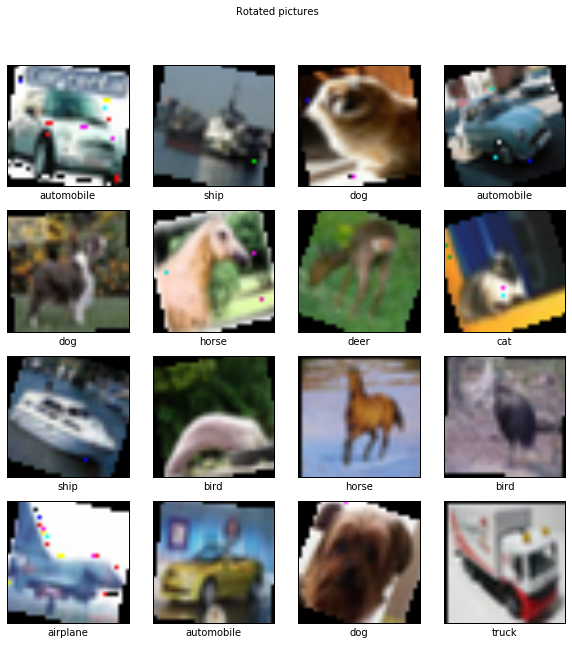

In [1]:
from hw3_utils import load_data
from hw3 import rotate_image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ds_rate=None
datasets = load_data(ds_rate=ds_rate,theano_shared=False)
train_set_x, train_set_y = datasets[0]
valid_set_x, valid_set_y = datasets[1]
test_set_x, test_set_y = datasets[2]
class_=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    img = (np.reshape(valid_set_x[i],(3,32,32))).transpose(1,2,0)
    img_tran = rotate_image(img)
    plt.imshow(img_tran)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('%s'%class_[valid_set_y[i]])
plt.suptitle('Rotated pictures')

Implement the neural network with this augmentation, show the improvement

In [2]:
from hw3 import test_lenet_rotation
test_lenet_rotation(learning_rate=0.05, n_epochs=200, nkerns=[32, 64], batch_size=300)

... Rotating images
... building the model
training @ iter =  0
training @ iter =  100
training @ iter =  200
epoch 1, minibatch 266/266, validation error 60.545455 %
     epoch 1, minibatch 266/266, test error of best model 60.070707 %
training @ iter =  300
training @ iter =  400
training @ iter =  500
epoch 2, minibatch 266/266, validation error 52.646465 %
     epoch 2, minibatch 266/266, test error of best model 52.797980 %
training @ iter =  600
training @ iter =  700
epoch 3, minibatch 266/266, validation error 52.000000 %
     epoch 3, minibatch 266/266, test error of best model 52.383838 %
training @ iter =  800
training @ iter =  900
training @ iter =  1000
epoch 4, minibatch 266/266, validation error 47.787879 %
     epoch 4, minibatch 266/266, test error of best model 48.686869 %
training @ iter =  1100
training @ iter =  1200
training @ iter =  1300
epoch 5, minibatch 266/266, validation error 46.020202 %
     epoch 5, minibatch 266/266, test error of best model 46.787879 

The training process for function test_lenet_rotation ran for 22.28m


### Problem 2: Bullet 3: Augmentation by flipping

Show a 4*4 figure of 16 input images with this augmentation

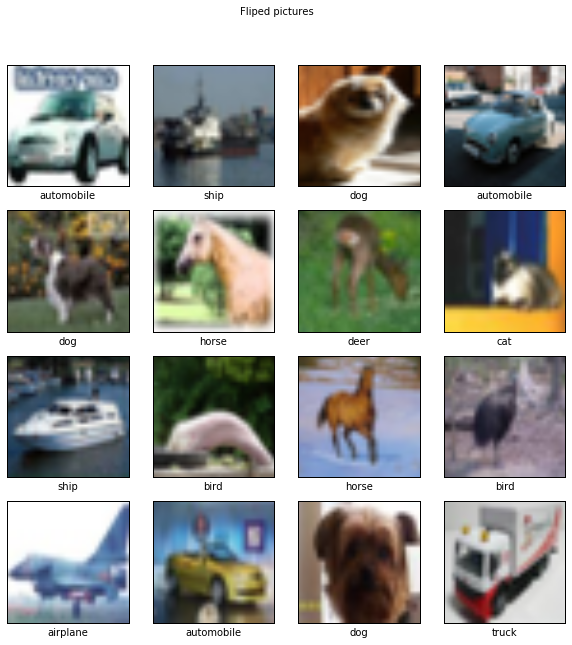

In [3]:
from hw3_utils import load_data
from hw3 import flip_image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ds_rate=None
datasets = load_data(ds_rate=ds_rate,theano_shared=False)
train_set_x, train_set_y = datasets[0]
valid_set_x, valid_set_y = datasets[1]
test_set_x, test_set_y = datasets[2]
class_=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    img = (np.reshape(valid_set_x[i],(3,32,32))).transpose(1,2,0)
    img_tran = flip_image(img)
    plt.imshow(img_tran)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('%s'%class_[valid_set_y[i]])
plt.suptitle('Fliped pictures')

Implement the neural network with this augmentation, show the improvement

In [4]:
from hw3 import test_lenet_flip
test_lenet_flip(learning_rate=0.05, n_epochs=200, nkerns=[32, 64], batch_size=300)

... Fliping images
... building the model
training @ iter =  0
training @ iter =  100
training @ iter =  200
epoch 1, minibatch 266/266, validation error 59.070707 %
     epoch 1, minibatch 266/266, test error of best model 59.181818 %
training @ iter =  300
training @ iter =  400
training @ iter =  500
epoch 2, minibatch 266/266, validation error 51.868687 %
     epoch 2, minibatch 266/266, test error of best model 51.646465 %
training @ iter =  600
training @ iter =  700
epoch 3, minibatch 266/266, validation error 46.868687 %
     epoch 3, minibatch 266/266, test error of best model 47.121212 %
training @ iter =  800
training @ iter =  900
training @ iter =  1000
epoch 4, minibatch 266/266, validation error 46.242424 %
     epoch 4, minibatch 266/266, test error of best model 46.818182 %
training @ iter =  1100
training @ iter =  1200
training @ iter =  1300
epoch 5, minibatch 266/266, validation error 45.161616 %
     epoch 5, minibatch 266/266, test error of best model 45.696970 %

The training process for function test_lenet_flip ran for 22.27m


### Problem 2: Bullet 4: Augmentation by injecting noise into input

Show a 4*4 figure of 16 input images with this augmentation

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


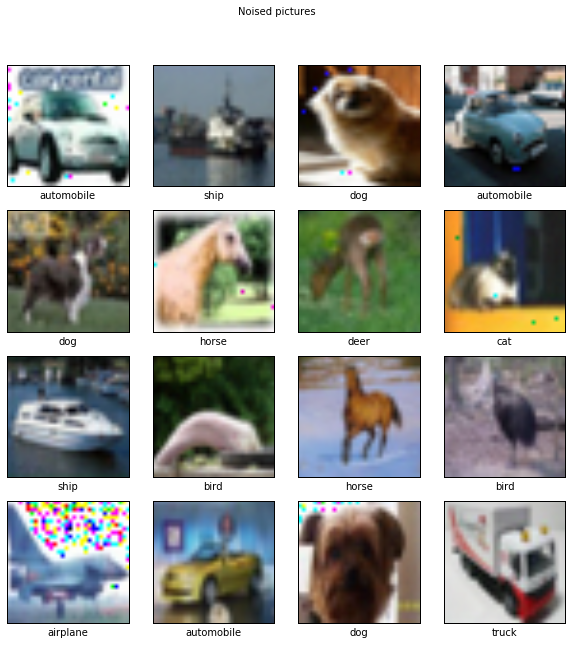

In [1]:
from hw3_utils import load_data
from hw3 import noise_injection
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ds_rate=None
datasets = load_data(ds_rate=ds_rate,theano_shared=False)
train_set_x, train_set_y = datasets[0]
valid_set_x, valid_set_y = datasets[1]
test_set_x, test_set_y = datasets[2]
class_=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    img = (np.reshape(valid_set_x[i],(3,32,32))).transpose(1,2,0)
    img_tran = noise_injection(img)
    plt.imshow(img_tran)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('%s'%class_[valid_set_y[i]])
plt.suptitle('Noised pictures')

Implement the neural network with this augmentation, show the improvement

In [2]:
from hw3 import test_lenet_inject_noise_input
test_lenet_inject_noise_input(learning_rate=0.05, n_epochs=200, nkerns=[32, 64], batch_size=300)

... Ennoising images
... building the model
training @ iter =  0
training @ iter =  100
training @ iter =  200
epoch 1, minibatch 266/266, validation error 59.535354 %
     epoch 1, minibatch 266/266, test error of best model 59.171717 %
training @ iter =  300
training @ iter =  400
training @ iter =  500
epoch 2, minibatch 266/266, validation error 51.070707 %
     epoch 2, minibatch 266/266, test error of best model 51.070707 %
training @ iter =  600
training @ iter =  700
epoch 3, minibatch 266/266, validation error 52.505051 %
training @ iter =  800
training @ iter =  900
training @ iter =  1000
epoch 4, minibatch 266/266, validation error 42.535354 %
     epoch 4, minibatch 266/266, test error of best model 42.888889 %
training @ iter =  1100
training @ iter =  1200
training @ iter =  1300
epoch 5, minibatch 266/266, validation error 40.272727 %
     epoch 5, minibatch 266/266, test error of best model 40.333333 %
training @ iter =  1400
training @ iter =  1500
epoch 6, minibatch 

The training process for function test_lenet_inject_noise_input ran for 22.10m


### Problem 3: Implement your own achitecture to achieve at least 80% testing accuracy on CIFAR-10 test set

I have tried mainly 3 achitectures to obtain 80% testing accuracy, and the last one succeeded.

First Achitecture:
```
Data Argumentation: Flip images
layer1: LeNetConvPoolLayer(using tanh)
    conv kernel_size: 32*3*3    pool kernel_size: 2*2
layer2: LeNetConvPoolLayer(using tanh)
    conv kernel_size: 64*3*3    pool kernel_size: 2*2
layer3: DropoutHiddenLayer(using ReLU) + Momentum
layer4: DropoutHiddenLayer(using ReLU) + Momentum
layer5: DropoutHiddenLayer(using ReLU) + Momentum
layer6: DropoutHiddenLayer(using ReLU) + Momentum
layer7: LogisticRegression
```
The result of this achitecture reached 23.130000% in validation error, and 24.370000% in test error.

In [2]:
from hw3 import MY_lenet
MY_lenet(learning_rate=0.1, n_epochs=200, nkerns=[32, 64], batch_size=100)

... Fliping images
... building the model
layer0.output.shape =
[100  32  15  15]
gamma.shape =
(32,)
beta.shape =
(32,)
layerbn_output.shape =
[100  32  15  15]
training @ iter =  0
training @ iter =  100
training @ iter =  200
training @ iter =  300
training @ iter =  400
training @ iter =  500
training @ iter =  600
training @ iter =  700
epoch 1, minibatch 800/800, validation error 89.750000 %
     epoch 1, minibatch 800/800, test error of best model 90.000000 %
training @ iter =  800
training @ iter =  900
training @ iter =  1000
training @ iter =  1100
training @ iter =  1200
training @ iter =  1300
training @ iter =  1400
training @ iter =  1500
epoch 2, minibatch 800/800, validation error 81.070000 %
     epoch 2, minibatch 800/800, test error of best model 80.950000 %
training @ iter =  1600
training @ iter =  1700
training @ iter =  1800
training @ iter =  1900
training @ iter =  2000
training @ iter =  2100
training @ iter =  2200
training @ iter =  2300
epoch 3, minibatch 8

The training process for function MY_lenet ran for 110.37m


Second Achitecture:
```
Data Argumentation: Flip images
layer1: LeNetConvPoolLayer(using ReLU)
    conv kernel_size: 32*3*3    pool kernel_size: 2*2
Batch Normalization
layer2: LeNetConvPoolLayer(using ReLU)
    conv kernel_size: 64*3*3    pool kernel_size: 2*2
layer3: DropoutHiddenLayer(using ReLU) + Momentum
layer4: DropoutHiddenLayer(using ReLU) + Momentum
layer5: DropoutHiddenLayer(using ReLU) + Momentum
layer6: DropoutHiddenLayer(using ReLU) + Momentum
layer7: LogisticRegression
```
The result of this achitecture reached 22.810000% in validation error, and 23.910000% in test error.

In [1]:
from hw3 import MY_lenet
MY_lenet(learning_rate=0.1, n_epochs=200, nkerns=[32, 64], batch_size=100)

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


... Fliping images
... building the model
training @ iter =  0
training @ iter =  100
training @ iter =  200
training @ iter =  300
training @ iter =  400
training @ iter =  500
training @ iter =  600
training @ iter =  700
epoch 1, minibatch 800/800, validation error 88.480000 %
     epoch 1, minibatch 800/800, test error of best model 88.750000 %
training @ iter =  800
training @ iter =  900
training @ iter =  1000
training @ iter =  1100
training @ iter =  1200
training @ iter =  1300
training @ iter =  1400
training @ iter =  1500
epoch 2, minibatch 800/800, validation error 80.060000 %
     epoch 2, minibatch 800/800, test error of best model 80.620000 %
training @ iter =  1600
training @ iter =  1700
training @ iter =  1800
training @ iter =  1900
training @ iter =  2000
training @ iter =  2100
training @ iter =  2200
training @ iter =  2300
epoch 3, minibatch 800/800, validation error 76.510000 %
     epoch 3, minibatch 800/800, test error of best model 76.280000 %
training @ it

The training process for function MY_lenet ran for 246.51m


Third Achitecture:
```
Data Argumentation: Flip images
Batch Normalization
layer1: ConvLayer(using ReLU) 
    kernel_size: 32*3*3
Batch Normalization
layer2: ConvLayer(using ReLU)
    kernel_size: 64*3*3
Batch Normalization
layer3: ConvLayer(using ReLU)
    kernel_size: 96*3*3
layer4: MaxPooling
    kernel_size: 2*2
layer5: DropoutHiddenLayer(using ReLU) + Momentum
layer6: DropoutHiddenLayer(using ReLU) + Momentum
layer7: DropoutHiddenLayer(using ReLU) + Momentum
layer8: DropoutHiddenLayer(using ReLU) + Momentum
layer9: LogisticRegression
```
The result of this achitecture reached 18.870000% in validation error, and 19.730000 % in test error.

In [1]:
from hw3p3 import MY_lenet2
MY_lenet2(learning_rate=0.2, n_epochs=200, nkerns=[32, 64, 96], batch_size=200)

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


... Fliping images
... building the model
training @ iter =  0
training @ iter =  100
training @ iter =  200
training @ iter =  300
epoch 1, minibatch 400/400, validation error 89.750000 %
     epoch 1, minibatch 400/400, test error of best model 90.000000 %
training @ iter =  400
training @ iter =  500
training @ iter =  600
training @ iter =  700
epoch 2, minibatch 400/400, validation error 81.930000 %
     epoch 2, minibatch 400/400, test error of best model 81.830000 %
training @ iter =  800
training @ iter =  900
training @ iter =  1000
training @ iter =  1100
epoch 3, minibatch 400/400, validation error 78.850000 %
     epoch 3, minibatch 400/400, test error of best model 78.940000 %
training @ iter =  1200
training @ iter =  1300
training @ iter =  1400
training @ iter =  1500
epoch 4, minibatch 400/400, validation error 70.250000 %
     epoch 4, minibatch 400/400, test error of best model 71.060000 %
training @ iter =  1600
training @ iter =  1700
training @ iter =  1800
traini

The training process for function MY_lenet2 ran for 563.28m


### Problem 4: Implement the convolutional neural network depicted in this problem

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


... building the model
training @ iter =  0
epoch 1, minibatch 80/80, MSE 0.017221 
training @ iter =  100
epoch 2, minibatch 80/80, MSE 0.013802 
training @ iter =  200
epoch 3, minibatch 80/80, MSE 0.011976 
training @ iter =  300
epoch 4, minibatch 80/80, MSE 0.010763 
epoch 5, minibatch 80/80, MSE 0.013832 
training @ iter =  400
epoch 6, minibatch 80/80, MSE 0.009750 
training @ iter =  500
epoch 7, minibatch 80/80, MSE 0.012136 
training @ iter =  600
epoch 8, minibatch 80/80, MSE 0.009618 
training @ iter =  700
epoch 9, minibatch 80/80, MSE 0.009685 
epoch 10, minibatch 80/80, MSE 0.011303 
training @ iter =  800
epoch 11, minibatch 80/80, MSE 0.007742 
training @ iter =  900
epoch 12, minibatch 80/80, MSE 0.010703 
training @ iter =  1000
epoch 13, minibatch 80/80, MSE 0.009097 
training @ iter =  1100
epoch 14, minibatch 80/80, MSE 0.008047 
epoch 15, minibatch 80/80, MSE 0.010074 
training @ iter =  1200
epoch 16, minibatch 80/80, MSE 0.007374 
training @ iter =  1300
epoch 

The training process for function MY_CNN ran for 729.86m


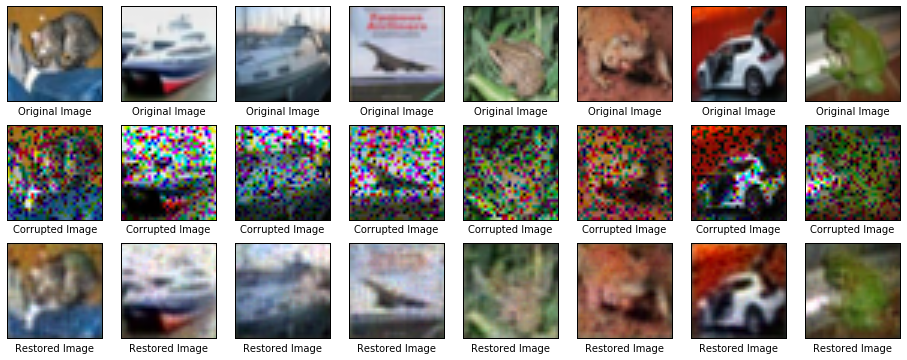

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from hw3p4 import MY_CNN
MY_CNN(learning_rate=0.1, n_epochs=128, batch_size=500)

The restored images are shown above.